In [ ]:
#dataset stuff
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#download
!kaggle datasets download -d muhammadkhalid/sign-language-for-numbers

Dataset URL: https://www.kaggle.com/datasets/muhammadkhalid/sign-language-for-numbers
License(s): CC0-1.0


In [ ]:
!unzip /content/sign-language-for-numbers.zip

Streaming output truncated to the last 5000 lines.
  inflating: Sign Language for Numbers/7/seven_549.jpg  
  inflating: Sign Language for Numbers/7/seven_55.jpg  
  inflating: Sign Language for Numbers/7/seven_550.jpg  
  inflating: Sign Language for Numbers/7/seven_551.jpg  
  inflating: Sign Language for Numbers/7/seven_552.jpg  
  inflating: Sign Language for Numbers/7/seven_553.jpg  
  inflating: Sign Language for Numbers/7/seven_554.jpg  
  inflating: Sign Language for Numbers/7/seven_555.jpg  
  inflating: Sign Language for Numbers/7/seven_556.jpg  
  inflating: Sign Language for Numbers/7/seven_557.jpg  
  inflating: Sign Language for Numbers/7/seven_558.jpg  
  inflating: Sign Language for Numbers/7/seven_559.jpg  
  inflating: Sign Language for Numbers/7/seven_56.jpg  
  inflating: Sign Language for Numbers/7/seven_560.jpg  
  inflating: Sign Language for Numbers/7/seven_561.jpg  
  inflating: Sign Language for Numbers/7/seven_562.jpg  
  inflating: Sign Language for Numbers/

In [ ]:
#combine custom and dataset 64x64
import os
import shutil

#paths
CUSTOM_DATA_DIR = "/content/drive/MyDrive/customdata"
MAIN_DATASET_DIR = "/content/Sign Language for Numbers"

#loop through each digit folder
for label in map(str, range(10)):
    src_folder = os.path.join(CUSTOM_DATA_DIR, label)
    dst_folder = os.path.join(MAIN_DATASET_DIR, label)

    os.makedirs(dst_folder, exist_ok=True)

    existing_files = os.listdir(dst_folder)
    existing_count = len(existing_files)

    for i, file in enumerate(os.listdir(src_folder)):
        src_path = os.path.join(src_folder, file)

        #rename
        new_filename = f"webcam_{existing_count + i}.png"
        dst_path = os.path.join(dst_folder, new_filename)

        shutil.copy(src_path, dst_path)
        print(f"Copied {src_path} → {dst_path}")


Copied /content/drive/MyDrive/customdata/0/0.png → /content/Sign Language for Numbers/0/webcam_1500.png
Copied /content/drive/MyDrive/customdata/0/3.png → /content/Sign Language for Numbers/0/webcam_1501.png
Copied /content/drive/MyDrive/customdata/0/4.png → /content/Sign Language for Numbers/0/webcam_1502.png
Copied /content/drive/MyDrive/customdata/0/1.png → /content/Sign Language for Numbers/0/webcam_1503.png
Copied /content/drive/MyDrive/customdata/0/2.png → /content/Sign Language for Numbers/0/webcam_1504.png
Copied /content/drive/MyDrive/customdata/0/6.png → /content/Sign Language for Numbers/0/webcam_1505.png
Copied /content/drive/MyDrive/customdata/0/8.png → /content/Sign Language for Numbers/0/webcam_1506.png
Copied /content/drive/MyDrive/customdata/0/7.png → /content/Sign Language for Numbers/0/webcam_1507.png
Copied /content/drive/MyDrive/customdata/0/5.png → /content/Sign Language for Numbers/0/webcam_1508.png
Copied /content/drive/MyDrive/customdata/0/11.png → /content/Sig

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

IMG_SIZE = 32
DATASET_PATH = "/content/Sign Language for Numbers"

X = []
y = []
#iterate thru folder
for label in sorted(os.listdir(DATASET_PATH)):
  if not label.isdigit():
    continue
  for file in os.listdir(os.path.join(DATASET_PATH, label)):
      img = load_img(
          os.path.join(DATASET_PATH, label, file),
          color_mode="grayscale",
          target_size=(IMG_SIZE, IMG_SIZE)
      )
      img_array = img_to_array(img) / 255.0
      X.append(img_array)
      y.append(int(label)) #renaming unknown to 10

X = np.array(X)
y = np.array(y)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) #keeps proportions the same


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.Conv2D(8, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(np.unique(y)), activation='softmax')  #10 classes w/out the unknown
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25)


Epoch 1/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.1825 - loss: 2.2221 - val_accuracy: 0.5033 - val_loss: 1.5305
Epoch 2/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.5400 - loss: 1.4127 - val_accuracy: 0.6300 - val_loss: 1.1823
Epoch 3/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6710 - loss: 1.0721 - val_accuracy: 0.6950 - val_loss: 0.9691
Epoch 4/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.7367 - loss: 0.8557 - val_accuracy: 0.7320 - val_loss: 0.8457
Epoch 5/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7765 - loss: 0.7371 - val_accuracy: 0.7697 - val_loss: 0.7638
Epoch 6/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.8050 - loss: 0.6426 - val_accuracy: 0.7973 - val_loss: 0.6750
Epoch 7/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8287 - loss: 0.5723 - val_accuracy: 0.8087 - val_loss: 0.6376
Epoch 8/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.8459 - loss: 0.5161 - val

103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step


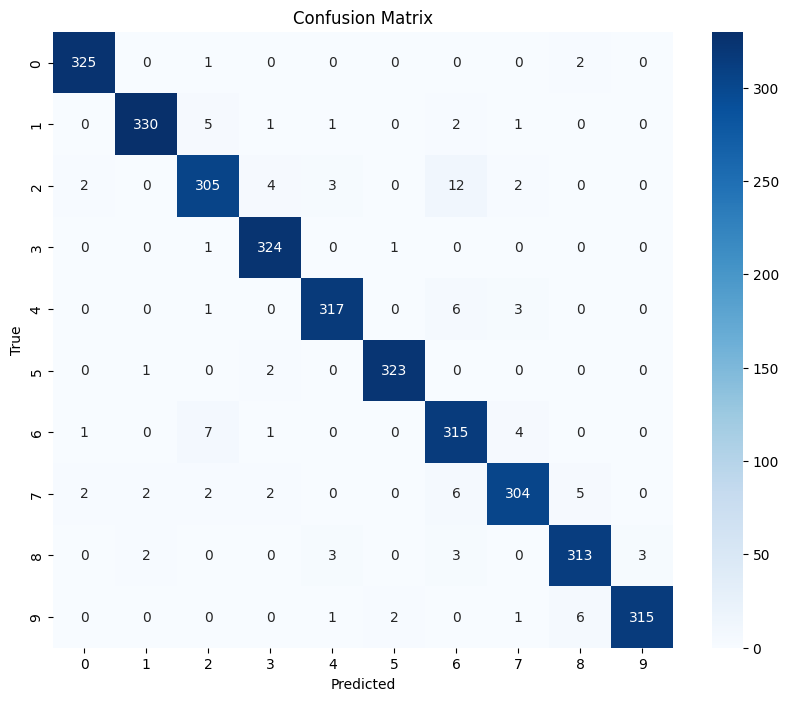

In [ ]:
#conf matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Get predictions on validation set
y_pred = np.argmax(model.predict(X_val), axis=1)

#confusion matrix
cm = confusion_matrix(y_val, y_pred)

#plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
model.export("/content/model/finger_model1")

#conv to tflite which is good for embeedded
converter = tf.lite.TFLiteConverter.from_saved_model("/content/model/finger_model1")
tflite_model = converter.convert()

with open("finger_model1.tflite", "wb") as f:
    f.write(tflite_model)


Saved artifact at '/content/model/finger_model1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  137947976905168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137947984452432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137947976906320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137947976906704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137947976905744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137947976905360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137947984452240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137947976906128: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
model.save("/content/model/finger_model1.keras")

In [ ]:
#64 version which is the version we used
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

#Config
IMG_SIZE = 64
DATASET_PATH = "/content/Sign Language for Numbers"
EPOCHS = 30
BATCH_SIZE = 32

#load and preprocess images
X, y = [], []

for label in sorted(os.listdir(DATASET_PATH)):
    if not label.isdigit(): continue
    for file in os.listdir(os.path.join(DATASET_PATH, label)):
        img = load_img(os.path.join(DATASET_PATH, label, file),
                       color_mode="grayscale",
                       target_size=(IMG_SIZE, IMG_SIZE))
        img_array = img_to_array(img) / 255.0  # normalize to [0,1]
        X.append(img_array)
        y.append(int(label))

X = np.array(X, dtype=np.float32)
y = np.array(y)

# split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Data augmentation for adjusting train data
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)

# Deeper CNN model can simplify tho later w model above
model = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 1)),

    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

#Early stopping + train
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
          validation_data=(X_val, y_val),
          epochs=EPOCHS,
          callbacks=[early_stop])


model.save("sign_model.keras")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,466 (669.79 KB)

 Trainable params: 171,466 (669.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


416/416 ━━━━━━━━━━━━━━━━━━━━ 57s 131ms/step - accuracy: 0.1809 - loss: 2.1907 - val_accuracy: 0.6321 - val_loss: 1.1248
Epoch 2/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 52s 125ms/step - accuracy: 0.5781 - loss: 1.2657 - val_accuracy: 0.8064 - val_loss: 0.6217
Epoch 3/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 83s 127ms/step - accuracy: 0.6990 - loss: 0.9219 - val_accuracy: 0.8757 - val_loss: 0.4049
Epoch 4/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 79s 120ms/step - accuracy: 0.7776 - loss: 0.6937 - val_accuracy: 0.9202 - val_loss: 0.2991
Epoch 5/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 52s 124ms/step - accuracy: 0.8094 - loss: 0.5756 - val_accuracy: 0.9320 - val_loss: 0.2413
Epoch 6/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 53s 127ms/step - accuracy: 0.8429 - loss: 0.4955 - val_accuracy: 0.9410 - val_loss: 0.2035
Epoch 7/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 54s 130ms/step - accuracy: 0.8595 - loss: 0.4315 - val_accuracy: 0.9509 - val_loss: 0.1648
Epoch 8/30
416/416 ━━━━━━━━━━━━━━━━━━━━ 51s 122ms/step - accuracy: 0.8767 - loss: 0.3763 - val

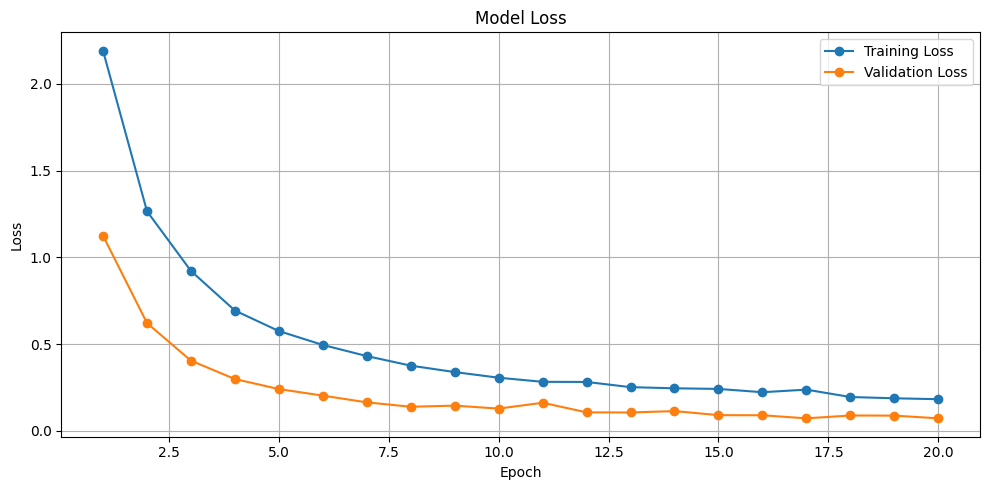

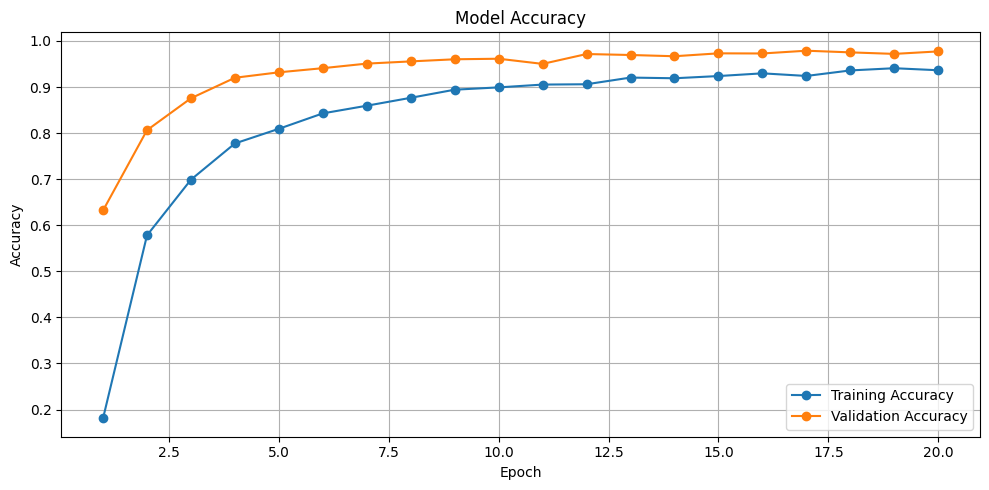

In [ ]:
#loss graphs for poster
import matplotlib.pyplot as plt

#manually copy-pasted values from training log
epochs = list(range(1, 21))

train_loss = [
    2.1907, 1.2657, 0.9219, 0.6937, 0.5756, 0.4955, 0.4315, 0.3763, 0.3393, 0.3068,
    0.2831, 0.2824, 0.2524, 0.2458, 0.2422, 0.2232, 0.2381, 0.1956, 0.1882, 0.1830
]

val_loss = [
    1.1248, 0.6217, 0.4049, 0.2991, 0.2413, 0.2035, 0.1648, 0.1394, 0.1459, 0.1288,
    0.1626, 0.1071, 0.1064, 0.1145, 0.0911, 0.0904, 0.0727, 0.0891, 0.0883, 0.0728
]

train_acc = [
    0.1809, 0.5781, 0.6990, 0.7776, 0.8094, 0.8429, 0.8595, 0.8767, 0.8943, 0.8993,
    0.9054, 0.9061, 0.9206, 0.9191, 0.9239, 0.9298, 0.9241, 0.9361, 0.9409, 0.9365
]

val_acc = [
    0.6321, 0.8064, 0.8757, 0.9202, 0.9320, 0.9410, 0.9509, 0.9557, 0.9603, 0.9615,
    0.9503, 0.9717, 0.9696, 0.9669, 0.9732, 0.9729, 0.9789, 0.9753, 0.9720, 0.9774
]

#loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_acc, label='Training Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np

#Load trained model
model = tf.keras.models.load_model("sign_model.keras")

def representative_dataset():
    for i in range(100):
        img = X_train[i].astype(np.float32)
        yield [np.expand_dims(img, axis=0)]

# converter setup
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_types = [tf.int8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

tflite_model = converter.convert()

#save the .tflite model
with open("sign_model_uint8_3.tflite", "wb") as f:
    f.write(tflite_model)

# try to make c header for the model for microcontroller but idk if this helpful
with open("sign_model_uint8_3.cc", "w") as f:
    f.write("const unsigned char sign_model[] = {\n")
    f.write(",".join(str(b) for b in tflite_model))
    f.write("\n};\n")
    f.write(f"const int sign_model_len = {len(tflite_model)};\n")


Saved artifact at '/tmp/tmppx4tdle4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 64, 1), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  132719170697936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132719125480272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132719170699088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132719161198928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132719161199312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132719161197392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132716482432656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132716482435728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132716482435920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132716480324112: TensorSpec(shape=(), dtype=tf.resource, name=None)


/usr/local/lib/python3.11/dist-packages/tensorflow/lite/python/convert.py:997: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


In [ ]:
#count data
import os
from collections import Counter

DATASET_PATH = "/content/Sign Language for Numbers"

class_counts = {}

for label in sorted(os.listdir(DATASET_PATH)):
    class_dir = os.path.join(DATASET_PATH, label)
    if os.path.isdir(class_dir):
        num_images = len(os.listdir(class_dir))
        class_counts[label] = num_images

#print the counts
for label, count in class_counts.items():
    print(f"Class {label}: {count} images")


Class 0: 1661 images
Class 1: 1661 images
Class 2: 1661 images
Class 3: 1661 images
Class 4: 1661 images
Class 5: 1661 images
Class 6: 1661 images
Class 7: 1661 images
Class 8: 1661 images
Class 9: 1661 images
Class unknown: 1500 images


In [ ]:
#code for live implementation (not run on colab)

import cv2
import numpy as np
import tensorflow as tf

#load the TFLite model (with uint8 input/output)
interpreter = tf.lite.Interpreter(model_path="C:/Users/micha/Downloads/sign_model_uint8_3.tflite") #elliot change the path here when u use
interpreter.allocate_tensors()

#get model input/output details aka what model is expecting
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
IMG_SIZE = input_details[0]['shape'][1]

#labels for the digits 0–9
CLASS_NAMES = [str(i) for i in range(10)]

#use cv2 to start webcam
cap = cv2.VideoCapture(0)
#print("Press 'q' to quit.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    #center crop the frame to square
    h, w = frame.shape[:2]
    min_edge = min(h, w)
    roi = frame[h//2 - min_edge//2 : h//2 + min_edge//2,
                w//2 - min_edge//2 : w//2 + min_edge//2]

    #preprocess: grayscale and resize input to 64x64
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (IMG_SIZE, IMG_SIZE))

    #model expects uint8 input in range [0, 255] cus of space stuff
    input_img = resized.reshape(1, IMG_SIZE, IMG_SIZE, 1).astype(np.uint8)

    #Inference for the new input from webcam (using the train model to make predictions)
    interpreter.set_tensor(input_details[0]['index'], input_img)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details[0]['index'])

    pred_class = int(np.argmax(output))
    confidence = float(np.max(output)) / 255.0  #scale back to [0, 1]

    #display result at top
    label = f"{CLASS_NAMES[pred_class]} ({confidence:.2f})"
    cv2.putText(frame, label, (10, 35), cv2.FONT_HERSHEY_SIMPLEX,
                1.2, (0, 255, 0), 2, cv2.LINE_AA)

    #show live webcam feed
    cv2.imshow("Live Inference", frame)

    #show zoomed in input to the model (64x64)
    zoomed = cv2.resize(resized, (IMG_SIZE * 8, IMG_SIZE * 8), interpolation=cv2.INTER_NEAREST)
    cv2.imshow("Model Input (64x64)", zoomed)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


ValueError: Could not open 'C:/Users/micha/Downloads/sign_model_uint8_3.tflite'.